###### NIANG Abdou

# **Breast cancer dataset**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Chargez le dataset comme nous l'avons fait pour le dataset `iris`. Pourquoi souhaitons-nous apprendre un modèle de classification sur ce dataset ? Répondez aux questions 2. à 3. du TD précédent pour ce nouveau dataset (utilisez les deux tiers des données pour l'apprentissage).

**Chargement du dataset Breast Cancer**

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Pourquoi apprendre un modèle de classification sur ce dataset?

In [3]:
# Description des données
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

*L’objectif est prédire le label de classe pour savoir si une tumeur est maligne ( ou benigne) à partir des mesures effectuées*

**Conclusion : Donc on prend un modèle de `classification binaire`**



*

#### 2. Utilisez l'algorithme `sklearn.linear_model.LogisticRegression` pour apprendre un modèle en utilisant une régularisation de type `l2` et le solveur `liblinear`. Calculez l'erreur empirique et l'erreur en généralisation.

Le domaine des instances $\mathcal{X}$ est **$\mathcal{R}^{30}$** et l'ensemble des étiquettes $\mathcal{Y}$ est **{0,1}** car je dispose de deux classes.

Transformation des données en une DataFrame de la librairie pandas.

In [4]:
X = pd.DataFrame(cancer.data, columns=['mean radius' ,'mean texture', 'mean perimeter' ,'mean area',
    'mean smoothness' ,'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error' ,'concavity error',
    'concave points error' ,'symmetry error' ,'fractal dimension error',
    'worst radius' ,'worst texture', 'worst perimeter' ,'worst area',
    'worst smoothness', 'worst compactness' ,'worst concavity',
    'worst concave points' ,'worst symmetry' ,'worst fractal dimension'])
y = pd.Series(cancer.target)

la fonction sklearn.model_selection.train_test_split pour diviser les données en un ensemble d'entraînement et de test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67)

In [6]:
X_train.shape

(381, 30)

In [7]:
X_test.shape

(188, 30)

In [8]:
y_train.shape

(381,)

In [9]:
y_test.shape

(188,)

Utilisation l'algorithme sklearn.linear_model.LogisticRegression pour apprendre un modèle en utilisant une régularisation de type l2 et le solveur liblinear

In [10]:
from sklearn.linear_model import LogisticRegression

clf_cancer = LogisticRegression(random_state=0, penalty='l2', solver='liblinear').fit(X, y)

Calcul de l'erreur empirique et de l'erreur en généralisation.

In [11]:
from sklearn.metrics import mean_squared_error

print("erreur empirique: " , mean_squared_error(y_train, clf_cancer.predict(X_train)))
print("erreur en généralisation: " , mean_squared_error(y_test, clf_cancer.predict(X_test)))

erreur empirique:  0.04199475065616798
erreur en généralisation:  0.03723404255319149


#### 3. Par défaut la régression logistique permet d'apprendre des classificateurs linéaires. En vous inspirant des cours sur la régression, proposez une solution pour apprendre des classificateurs non linéaires en utilisant une régression logistique. Justifiez votre approche et vos éventuels choix de paramètres.

Pour permettre au modèle de s'ajuster à des données ayant des relations non-linéaires on veut modifier nos données en rajoutant les dimensions suivantes: x 2 , x 3 , ..., x d . Il existe une classe d'objects de scikit-learn qui fait justement ça:

In [12]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

(Notez le paramètre include_bias, que se passe t-il si on le met a vrai?).

In [13]:

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

d = 4
poly_log_lin = make_pipeline(PolynomialFeatures(d),
                           LogisticRegression(random_state=0, penalty='l2', solver='liblinear'))
poly_log_lin.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('logisticregression',
                 LogisticRegression(random_state=0, solver='liblinear'))])

#### 4. Calculez l'erreur empirique et l'erreur en généralisation des modèles appris par votre approche. Que constatez-vous ?

In [14]:
from sklearn.metrics import zero_one_loss

print("erreur empirique: {:.2f}".format(zero_one_loss(y_train, poly_log_lin.predict(X_train))))
print("erreur en généralisation: {:.2f}".format(zero_one_loss(y_test, poly_log_lin.predict(X_test))))

erreur empirique: 0.05
erreur en généralisation: 0.05


Nous constatons que la regression logistique est meilleure que la regression logistique polynômiale en ces termes que les erreurs sont plus petites par rapport à la regression logistique polynômiale.

#### 5. Utilisez l'algorithme du `sklearn.neighbors.KNeighborsClassifier` pour apprendre un nouveau modèle. Un paramètre très important de cet algorithme est le nombre `n_neighbors` de voisins sélectionnés.  Quelle valeur vous semble la plus appropriée pour ce dataset ? Justifiez.

Apprenons notre modèle par les knn

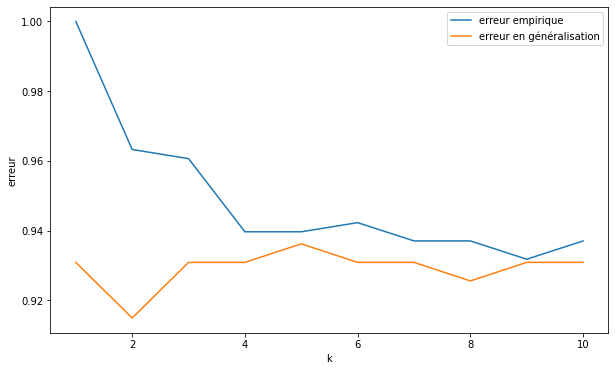

In [16]:
from sklearn.neighbors import KNeighborsClassifier


erreur_emp = []
erreur_gen = []
# On va faire varier k de 1 à 11
k_s = range(1, 11)

for k in k_s:
    # construction du modèle
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    # ajout des erreurs empiriques
    erreur_emp.append(clf.score(X_train, y_train))
    # ajout des erreurs en généralisation
    erreur_gen.append(clf.score(X_test, y_test))

#Affichage des erreurs
plt.figure(figsize=(10,6))
plt.plot(k_s, erreur_emp, label="erreur empirique")
plt.plot(k_s, erreur_gen, label="erreur en généralisation")
plt.ylabel("erreur")
plt.xlabel("k")
plt.legend()

Recherche du meilleur k

In [17]:
print("Erreur Empirique minimale = : ", min(erreur_emp),", n_neighbors = ", erreur_emp.index(min(erreur_emp))+1)
#erreur_emp.index(min(erreur_emp))+1) correspond a l'index de l'erreur minimale en commencant a compter a partir de 1

Erreur Empirique minimale = :  0.931758530183727 , n_neighbors =  9


**Dans notre Dataset, il est préférable d'utiliser k=9.**

## Dataset Two moons

In [19]:
from sklearn.datasets import make_moons
moons = make_moons(1000,noise=0.1)
moons_data = pd.DataFrame(moons[0])
moons_target = pd.Series(moons[1])

Apprenons notre modèle par les knn

#### 6. Les approches non linéaires sont plutôt décevantes sur le dataset `breast cancer`. Montrez leur intérêt en étudiant le dataset jouet two moons créé ci-dessus. N'oubliez pas que vous pouvez utiliser la méthode `visualize` pour afficher la frontière de décision d'un classificateur sur des données en 2 dimensions.

**Présentation des données**

In [22]:
print(moons)

(array([[ 1.06506773,  0.16693935],
       [-0.1830815 ,  1.02329563],
       [ 0.44983866,  0.74875874],
       ...,
       [ 2.0126185 ,  0.01748391],
       [ 0.03934658,  0.89610032],
       [-0.8224845 ,  0.66035486]]), array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,

In [23]:
moons_data.head()

,0,1
0,1.065068,0.166939
1,-0.183081,1.023296
2,0.449839,0.748759
3,1.917959,0.100059
4,0.811632,0.487660


In [24]:
moons_target.head()

0    0
1    0
2    0
3    1
4    0
dtype: int64

 **On va disviser nos données en données d'apprentissage et de test**

In [25]:
from sklearn.model_selection import train_test_split

moons_train, moons_test, ymoons_train, ymoons_test = train_test_split(moons_data, moons_target, train_size=0.67)

In [34]:
moons_train.head()

,0,1
495,-0.167859,1.130962
15,1.814199,-0.066986
184,0.794388,-0.482212
918,0.094842,0.398209
600,0.748121,-0.484200


En utilisant le code suivant, il est possible de visualiser la frontière de décision d'un classifieur clf pour des données en 2 dimensions.

In [26]:
def visualize(clf,X1,X2,y):
    """ Permet de visualiser la frontière de décision du classificateur clf.
                
    Parameters
    ----------
    clf : 
        Le classificateur à visualiser
    X1 : 
        La première dimension des données
    X2 :
        La seconde dimension des données
    y :
        Les étiquettes des exemples
    
    """     
    # Plotting decision regions
    x_min, x_max = np.array(X1).min() - 1, np.array(X1).max() + 1
    y_min, y_max = np.array(X2).min() - 1, np.array(X2).max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X1, X2, c=y, s=20, edgecolor='k')

    plt.show()

Le **perceptron** pouvant être utilisé pour un visualisation linéaire de nos données, nous allons l'utiliser ici

In [27]:
from sklearn.linear_model import Perceptron 
#instancier un objet perceptron
clf= Perceptron()

#Entrainons le modéle sur les données d'entrainement et etiquettes d'entrainement: 

clf.fit(moons_train, ymoons_train)

Perceptron()

In [29]:
ymoons_pred = clf.predict(moons_test)

Affichage du score puis des erreurs (généralisation et empirique)

In [30]:
print(" Score de l'ensemble de test: {}".format(clf.score(moons_test, ymoons_test)))

 Score de l'ensemble de test: 0.8727272727272727


**On a un score élevé donc le modèle est bien**

In [31]:
from sklearn.metrics import zero_one_loss
print("Erreur empirique      : {:.2}".format( zero_one_loss(ymoons_train, clf.predict(moons_train)))) 
print("Erreur en généralisation  : {:.2}".format(zero_one_loss(ymoons_test, clf.predict(moons_test))))

Erreur empirique      : 0.12
Erreur en généralisation  : 0.13


**Nos erreurs également sont faibles.**

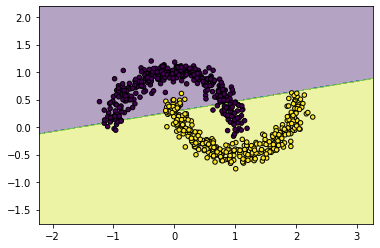

In [36]:
visualize(clf, moons_train[0], moons_train[1], ymoons_train)

**Après visualisation de nos données, nous voyons bien que le modèle linéaire est bien pour la représentation des données de notre Dataset moons**